## Import Library 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [5]:
path = 'https://www.econometrics.com/intro/SALES.txt'

In [7]:
data = pd.read_csv(path, sep='\s+', header=None)
data.head()

,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


## EDA (Exploratory Data Analysis)

In [8]:
# Rename columns of df dataframe
data.columns = ['Sales', 'Advertising']

In [9]:
# View dataframe summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes
None


In [10]:
# View descriptive statistics
print(data.describe())


           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


## Independent and Dependent Variables

In [11]:
# Declare feature variable and target variable

X = data['Sales'].values
y = data['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.
print(y)
# Values attribute of pandas dataframe returns the numpy arrays.


[15. 16. 18. 27. 21. 49. 21. 22. 28. 36. 40.  3. 21. 29. 62. 65. 46. 44.
 33. 62. 22. 12. 24.  3.  5. 14. 36. 40. 49.  7. 52. 65. 17.  5. 17.  1.]


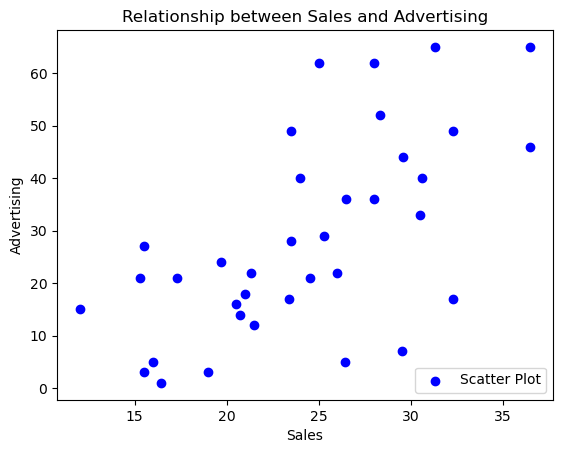

In [13]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

## Reshaping X and y

In [14]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [15]:
# Print the dimensions of X and y after reshaping

print(X)
print(y)

print(X.shape)
print(y.shape)

[[12. ]
 [20.5]
 [21. ]
 [15.5]
 [15.3]
 [23.5]
 [24.5]
 [21.3]
 [23.5]
 [28. ]
 [24. ]
 [15.5]
 [17.3]
 [25.3]
 [25. ]
 [36.5]
 [36.5]
 [29.6]
 [30.5]
 [28. ]
 [26. ]
 [21.5]
 [19.7]
 [19. ]
 [16. ]
 [20.7]
 [26.5]
 [30.6]
 [32.3]
 [29.5]
 [28.3]
 [31.3]
 [32.3]
 [26.4]
 [23.4]
 [16.4]]
[[15.]
 [16.]
 [18.]
 [27.]
 [21.]
 [49.]
 [21.]
 [22.]
 [28.]
 [36.]
 [40.]
 [ 3.]
 [21.]
 [29.]
 [62.]
 [65.]
 [46.]
 [44.]
 [33.]
 [62.]
 [22.]
 [12.]
 [24.]
 [ 3.]
 [ 5.]
 [14.]
 [36.]
 [40.]
 [49.]
 [ 7.]
 [52.]
 [65.]
 [17.]
 [ 5.]
 [17.]
 [ 1.]]
(36, 1)
(36, 1)


## Train test split

In [17]:
# Split X and y into training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Print the dimensions of X_train,X_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28, 1)
(28, 1)
(8, 1)
(8, 1)


## Modelling Machine Learning

In [19]:
lm = LinearRegression()

# Train the model using training data sets
lm.fit(X_train, y_train)

# Predict on the test data
y_pred = lm.predict(X_test)

print(y_pred)

[[14.80256613]
 [29.59488723]
 [31.58935749]
 [34.58106288]
 [48.20994299]
 [39.56723853]
 [23.27906474]
 [16.29841883]]


In [20]:
# Compute model slope and intercept
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:", a)
print("Estimated model intercept, b:", b)

Estimated model slope, a: [[1.66205855]]
Estimated model intercept, b: (array([-12.45519409]),)


The model slope is given by lm.coef and the model intercept term is given by lm.intercept. The estimated model slope and intercept values are 1.66205855 and -12.45519409. So, the equation of the fitted regression line is:

`y = 1.66205855 * x -12.45519409`

## Model Evalation

### RMSE (Root Mean Square Error)

In [21]:
# Calculate and print Root Mean Square Error(RMSE)
mse = mean_squared_error(y_test, y_pred)
print(mse)

rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

164.3461539052813
RMSE value: 12.8198


### R2 Score

In [22]:
# Calculate and print r2_score
from sklearn.metrics import r2_score
print("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))


R2 Score value: 0.5875


# Interpretation and Conclusion
The RMSE value has been found to be 12.8198. It means the standard deviation for our prediction is 12.8198. So, sometimes we expect the predictions to be off by more than 12.8198, and other times, we expect less than 12.8198. So, the model is not a good fit for the data.

In business decisions, the benchmark for the R2 score value is 0.7. It means if the R2 score value >= 0.7, then the model is good enough to deploy on unseen data, whereas if the R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be 0.5875. It means that this model explains 58.75 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide a good fit for the data.

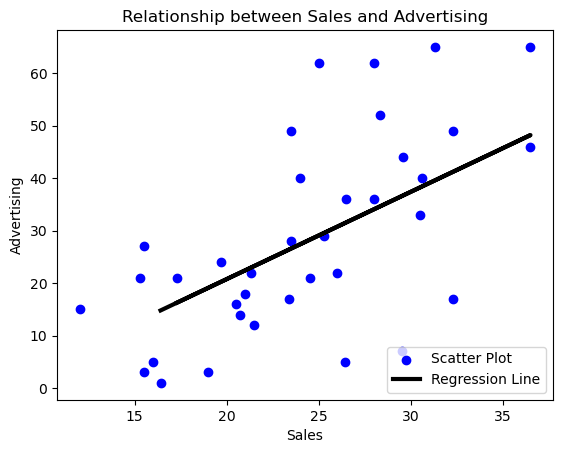

In [23]:
# Plot the Regression Line
plt.scatter(X, y, color='blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color='black', linewidth=3, label='Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

## Residual analysis

A linear regression model may not represent the data appropriately. The model may be a poor fit for the data. So, we should validate our model by defining and examining residual plots. The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter plot of these residuals is called the residual plot. If the data points in a residual plot are randomly dispersed around the horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise, a non-linear model may be more appropriate. If we take a look at the generated 'Residual errors' plot, we can clearly see that the train data plot pattern is non-random. The same is the case with the test data plot pattern. So, it suggests a better fit for a non-linear model.

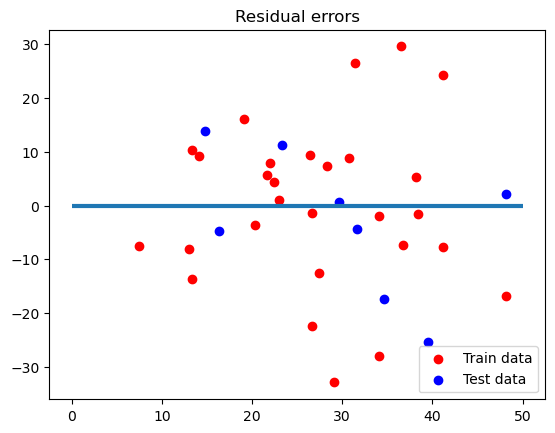

In [24]:
# Plotting residual errors
plt.scatter(lm.predict(X_train), lm.predict(X_train) -
            y_train, color='red', label='Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) -
            y_test, color='blue', label='Test data')
plt.hlines(xmin=0, xmax=50, y=0, linewidth=3)
plt.title('Residual errors')
plt.legend(loc=4)
plt.show()


## Save Modelling to Pickle

In [26]:
#Save the model to file in the current working directory
pickle_file_name = "regression.pkl"

with open(pickle_file_name, 'wb') as file:
    pickle.dump(lm, file)